Max Wang<br>
PHYS 434<br>
HW5

In [8]:
%matplotlib inline
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (20,10)

## Problem 1
The following 2D histogram is made from a background Gaussian distribution with $\sigma = 3.5$ with one million events, and uniform distribution of signals ranging from 0-20.

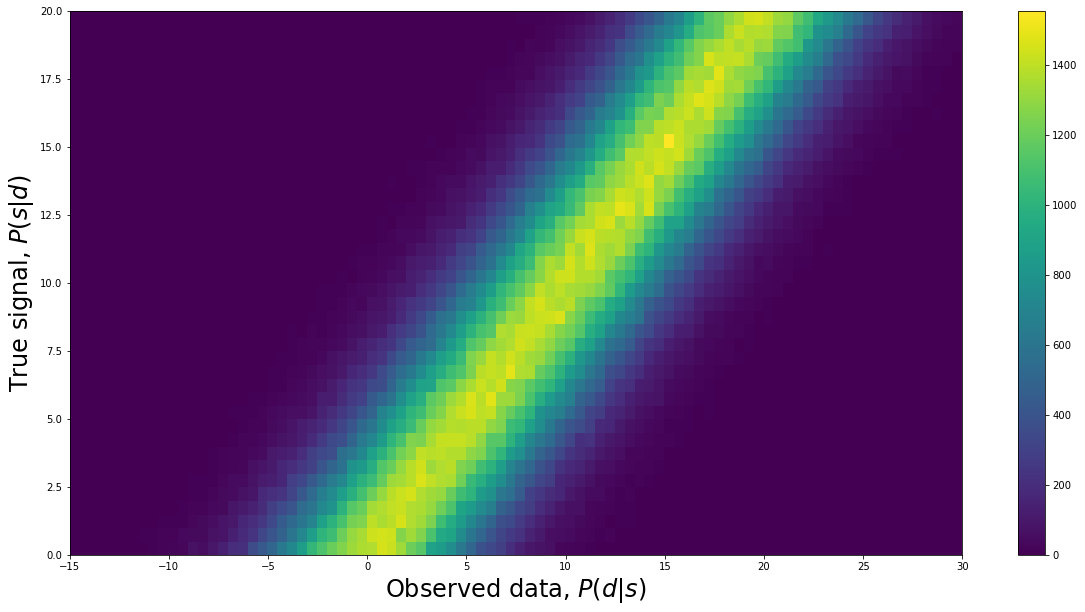

In [43]:
bkgd = stats.norm.rvs(0,3.5,1000000)
signal = stats.uniform.rvs(0,20,1000000)
data = bkgd + signal

signaledges = np.linspace(0,20,41)
dataedges = np.linspace(-15,30,91)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges])

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T,shading='auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.colorbar()
plt.show()

<b>1b)</b> This is my $P(d|s)$ plot with an injected true signal of 7.5. This is basically the distribution of possible observed signals if the incoming signal was of 7.5 units. To make this distribution, I basically took a horizontal slice where $P(s|d) = 7.5±0.1$. The step plot is the Gaussian PDF of the true signal, and your sliced data fits pretty well with it.

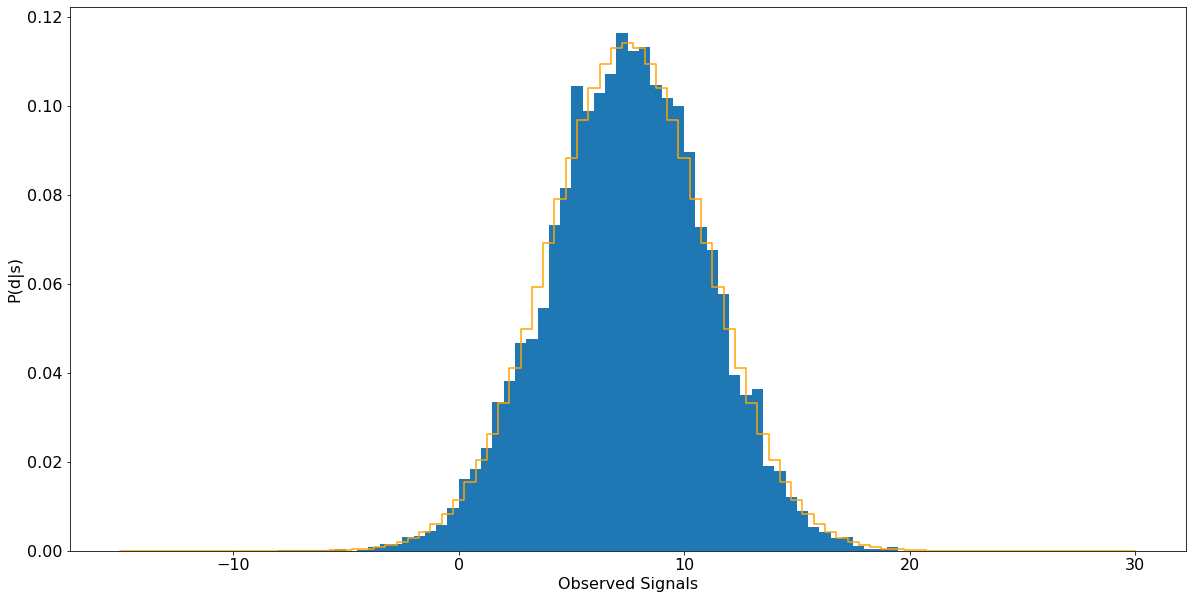

In [44]:
dataSlice = []
for i in range(len(signal)):
    if signal[i] >= (7.5 - 0.1) and signal[i] < (7.5 + 0.1):
        dataSlice.append(data[i])
plt.hist(dataSlice,dataedges,density=True)
Pds = stats.norm.pdf(np.add(dataedges,-7.5),0,3.5)
plt.step(dataedges,Pds,where="mid",color="orange")
plt.xlabel("Observed Signals",fontsize=16)
plt.ylabel("P(d|s)",fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

<b>1c)</b> This is my $P(s|d)$ plot for an observed value of 10. This is basically the distribution of possible true signals if the observed signal was of 10 units. To make this distribution, I took a vertical slice instead, where $P(d|s) = 10±0.1$. The step plot is the Gaussian PDF of the observed signal, and again the sliced fits pretty well. The reason why both 1b and 1c graphs are a bit noisy can attribute to including $±0.1$ range of values.

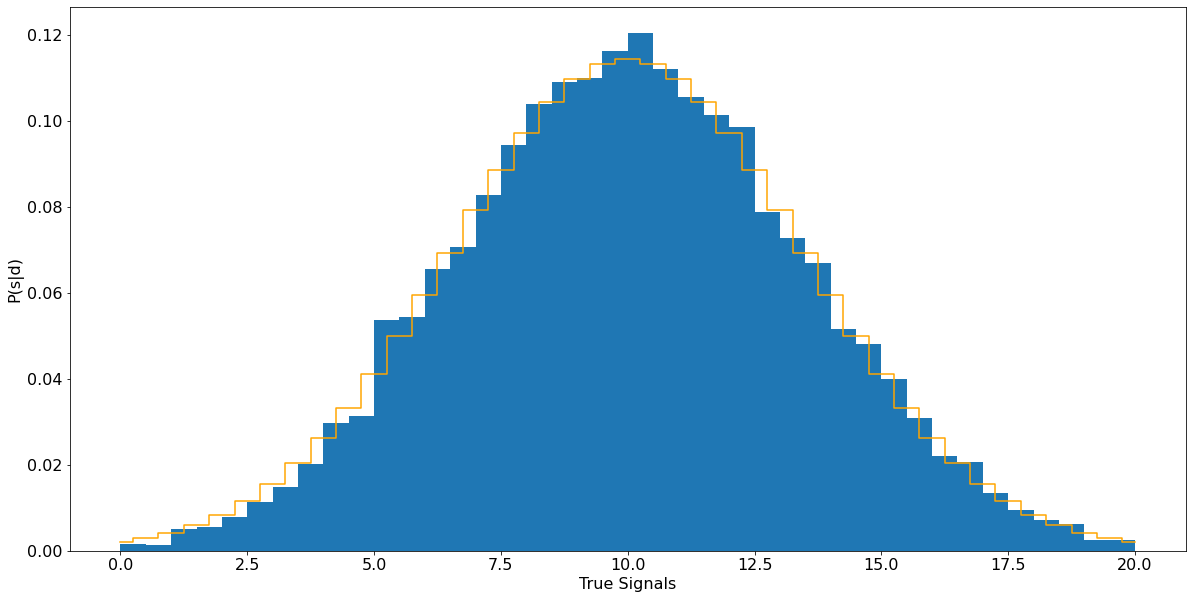

In [47]:
signalSlice = []
for i in range(len(data)):
    if data[i] >= (10 - 0.1) and data[i] < (10 + 0.1):
        signalSlice.append(signal[i])
Psd = np.multiply(stats.norm.pdf(np.add(signaledges,-10),0,3.5),stats.uniform.pdf(signaledges,0,20))
plt.hist(signalSlice,signaledges,density=True)
plt.step(signaledges,Psd/(0.5*sum(Psd)),where="mid",color="orange")
plt.xlabel("True Signals",fontsize=16)
plt.ylabel("P(s|d)",fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

## Problem 2

The following 2D histogram is basically the same as problem 1, but the background is now a Gaussian distribution with a mean of 5.

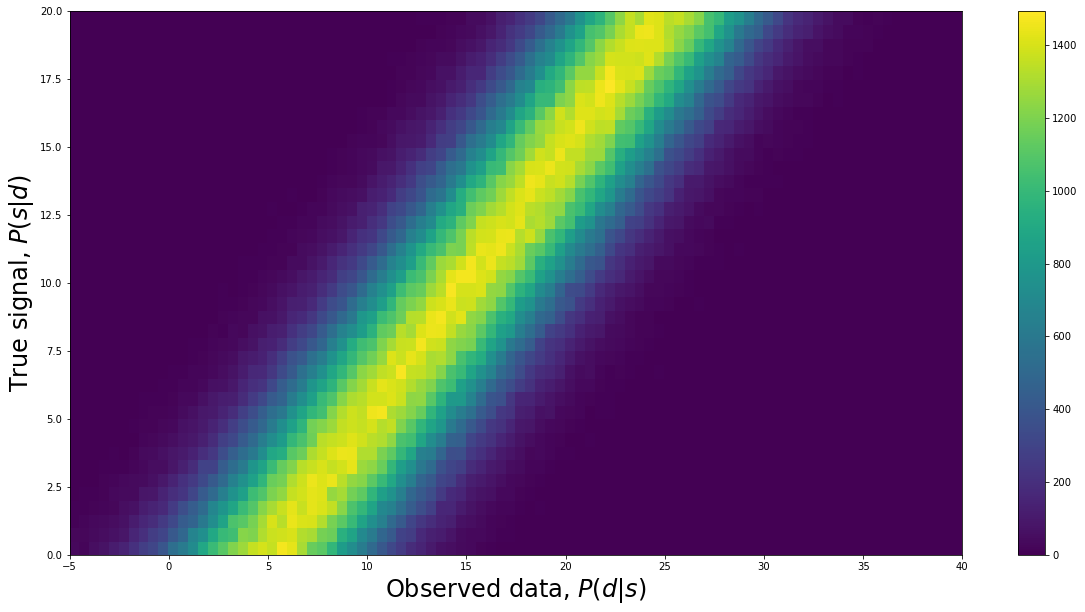

In [53]:
bkgd = stats.norm.rvs(5,3.5,1000000)
signal = stats.uniform.rvs(0,20,1000000)
data = bkgd + signal

signaledges = np.linspace(0,20,41)
dataedges = np.linspace(-5,40,91)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges])

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T,shading='auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.colorbar()
plt.show()

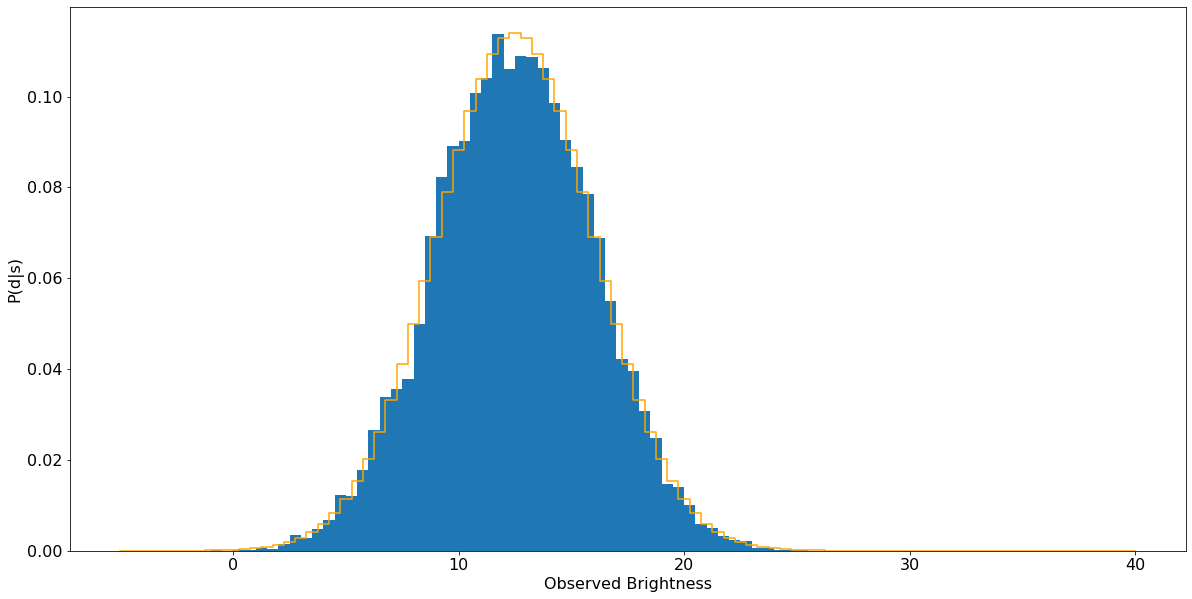

In [54]:
dataSlice = []
for i in range(len(signal)):
    if signal[i] >= (7.5 - 0.1) and signal[i] < (7.5 + 0.1):
        dataSlice.append(data[i])
plt.hist(dataSlice,dataedges,density=True)
Pds = stats.norm.pdf(np.add(dataedges,-7.5),5,3.5)
plt.step(dataedges,Pds,where="mid",color="orange")
plt.xlabel("Observed Signals",fontsize=16)
plt.ylabel("P(d|s)",fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

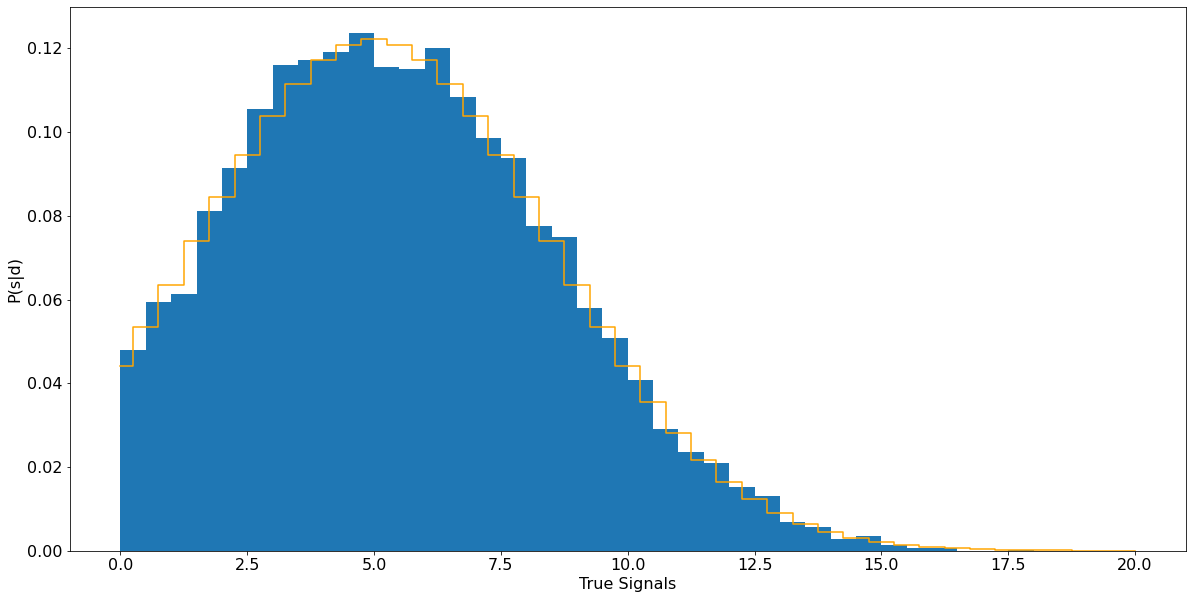

In [58]:
signalSlice = []
for i in range(len(data)):
    if data[i] >= (10 - 0.1) and data[i] < (10 + 0.1):
        signalSlice.append(signal[i])
Psd = np.multiply(stats.norm.pdf(np.add(signaledges,-10),-5,3.5),stats.uniform.pdf(signaledges,0,20))
plt.hist(signalSlice,signaledges,density=True)
plt.step(signaledges,Psd/(0.5*sum(Psd)),where="mid",color="orange")
plt.xlabel("True Signals",fontsize=16)
plt.ylabel("P(s|d)",fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

The resulting $P(d|s)$ and $P(s|d)$ plot contains a relatively same distribution, except with shifted means. For the $P(d|s)$ plot, the mean was shifted by +5, and the other -5. This is probably attributed by some sort of error, whether it's the observing machine or uniform background noise, causing an offset between the true and observed signal. In this case, looking at the $P(d|s)$ plot, our machine is reading signals 5 units higher than the true signal. On the other hand with the $P(s|d)$ plot, the incoming true signal is being read 5 units lower by the machine.